In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
air_pollution_hammer = pd.read_excel('../data_unclean/PM25/hammersmith-and-fulham-pm25-xlsm-48.xls',
                                     sheet_name = 'Hospitalisations Avoided')
air_pollution_hammer.head(5)

,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,1,2016,childhood asthma,0-5,-0.010039,0.063490
1,1,2016,childhood asthma,06-17,0.080552,0.148169
2,1,2016,childhood asthma,18-64,0.673188,0.401905
3,1,2016,childhood asthma,65+,0.156875,0.159396
4,1,2016,childhood asthma,total,0.900577,0.461432


# Data Cleaning for Hammersmith and Fulham

In [3]:
air_pollution_hammer.drop(columns=['Scenario'], inplace=True)
air_pollution_hammer.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,2016,childhood asthma,0-5,-0.010039,0.063490
1,2016,childhood asthma,06-17,0.080552,0.148169
2,2016,childhood asthma,18-64,0.673188,0.401905
3,2016,childhood asthma,65+,0.156875,0.159396
4,2016,childhood asthma,total,0.900577,0.461432


In [4]:
air_pollution_hammer.fillna(value='???', limit=1, axis=1)
air_pollution_hammer.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,2016,childhood asthma,0-5,-0.010039,0.063490
1,2016,childhood asthma,06-17,0.080552,0.148169
2,2016,childhood asthma,18-64,0.673188,0.401905
3,2016,childhood asthma,65+,0.156875,0.159396
4,2016,childhood asthma,total,0.900577,0.461432


In [5]:
air_pollution_hammer['Disease'].astype('str')
air_pollution_hammer.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,2016,childhood asthma,0-5,-0.010039,0.063490
1,2016,childhood asthma,06-17,0.080552,0.148169
2,2016,childhood asthma,18-64,0.673188,0.401905
3,2016,childhood asthma,65+,0.156875,0.159396
4,2016,childhood asthma,total,0.900577,0.461432


In [6]:
fill_gaps = air_pollution_hammer['Year'].fillna('Not Inclusive', inplace = True)
air_pollution_hammer.head(5)

/var/folders/ww/_8wv3jzj27l9t1190v0wsbyc0000gn/T/ipykernel_51129/3219669392.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fill_gaps = air_pollution_hammer['Year'].fillna('Not Inclusive', inplace = True)


,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,2016,childhood asthma,0-5,-0.010039,0.063490
1,2016,childhood asthma,06-17,0.080552,0.148169
2,2016,childhood asthma,18-64,0.673188,0.401905
3,2016,childhood asthma,65+,0.156875,0.159396
4,2016,childhood asthma,total,0.900577,0.461432


In [7]:
air_pollution_hammer = air_pollution_hammer.rename(columns={'95% CL':'Confidence Level'})
air_pollution_hammer.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
0,2016,childhood asthma,0-5,-0.010039,0.063490
1,2016,childhood asthma,06-17,0.080552,0.148169
2,2016,childhood asthma,18-64,0.673188,0.401905
3,2016,childhood asthma,65+,0.156875,0.159396
4,2016,childhood asthma,total,0.900577,0.461432


In [8]:
total_hospitalisations_hammer = air_pollution_hammer.rename(columns={'Disease': 'Condition', 'AgeGroup': 'Age'})
total_hospitalisations_hammer.head(5)

,Year,Condition,Age,Hospitalisations Avoided,Confidence Level
0,2016,childhood asthma,0-5,-0.010039,0.063490
1,2016,childhood asthma,06-17,0.080552,0.148169
2,2016,childhood asthma,18-64,0.673188,0.401905
3,2016,childhood asthma,65+,0.156875,0.159396
4,2016,childhood asthma,total,0.900577,0.461432


In [9]:
missing_values = air_pollution_hammer.isnull().sum()
missing_values

Year                        0
Disease                     0
AgeGroup                    0
Hospitalisations Avoided    0
Confidence Level            0
dtype: int64

In [10]:
duplicated_values = air_pollution_hammer.duplicated().sum()
duplicated_values 

351

# Filtering and Shaping the Data for Hammersmith and Fulham

In [11]:
filtered_data_2016_ham = air_pollution_hammer[air_pollution_hammer['Year'] == 2016].iloc[:, :]
filtered_data_2016_ham.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
0,2016,childhood asthma,0-5,-0.010039,0.063490
1,2016,childhood asthma,06-17,0.080552,0.148169
2,2016,childhood asthma,18-64,0.673188,0.401905
3,2016,childhood asthma,65+,0.156875,0.159396
4,2016,childhood asthma,total,0.900577,0.461432


In [12]:
filtered_data_2023_ham = air_pollution_hammer[air_pollution_hammer['Year'] == 2023].iloc[:, :]
filtered_data_2023_ham.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
182,2023,childhood asthma,0-5,0.015340,0.062249
183,2023,childhood asthma,06-17,0.775904,0.142795
184,2023,childhood asthma,18-64,0.836026,0.380373
185,2023,childhood asthma,65+,0.116167,0.154984
186,2023,childhood asthma,total,1.743438,0.439283


# Descriptive Statistics Hammersmith and Fulham

In [13]:
air_pollution_hammer.dtypes

Year                          int64
Disease                      object
AgeGroup                     object
Hospitalisations Avoided    float64
Confidence Level            float64
dtype: object

In [14]:
air_pollution_hammer.value_counts('AgeGroup')

AgeGroup
total    630
0-5      525
06-17    525
18-64    525
65+      525
Name: count, dtype: int64

In [15]:
air_pollution_hammer.value_counts('Disease')

Disease
childhood asthma                         525
chronic obstructive pulmonary disease    525
coronary heart disease                   525
lung cancer                              525
stroke                                   525
total                                    105
Name: count, dtype: int64

In [16]:
air_pollution_hammer.sum()

Year                                                                  5550090
Disease                     childhood asthmachildhood asthmachildhood asth...
AgeGroup                    0-506-1718-6465+total0-506-1718-6465+total0-50...
Hospitalisations Avoided                                        194802.972161
Confidence Level                                                  5659.856297
dtype: object

In [17]:
filtered_data_2016_ham['Hospitalisations Avoided'].describe()

count     78.000000
mean       9.742850
std       40.810683
min       -0.550466
25%        0.000000
50%        0.137988
75%        0.945271
max      240.996839
Name: Hospitalisations Avoided, dtype: float64

In [18]:
filtered_data_2023_ham['Hospitalisations Avoided'].describe()

count      78.000000
mean       49.870513
std       185.917471
min        -0.252887
25%         0.000122
50%         0.793658
75%         6.215622
max      1094.602257
Name: Hospitalisations Avoided, dtype: float64

In [19]:
filtered_data_2016_ham['Hospitalisations Avoided'].median()

0.1379885

In [20]:
filtered_data_2023_ham['Hospitalisations Avoided'].median()

0.793658

# Exploratory Analysis Hammersmith and Fulham

In [21]:
air_pollution_hammer.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
0,2016,childhood asthma,0-5,-0.010039,0.063490
1,2016,childhood asthma,06-17,0.080552,0.148169
2,2016,childhood asthma,18-64,0.673188,0.401905
3,2016,childhood asthma,65+,0.156875,0.159396
4,2016,childhood asthma,total,0.900577,0.461432


In [22]:
info = air_pollution_hammer.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      2730 non-null   int64  
 1   Disease                   2730 non-null   object 
 2   AgeGroup                  2730 non-null   object 
 3   Hospitalisations Avoided  2730 non-null   float64
 4   Confidence Level          2730 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 106.8+ KB


In [23]:
air_pollution_hammer.shape

(2730, 5)

In [24]:
air_pollution_hammer.describe()

,Year,Hospitalisations Avoided,Confidence Level
count,2730.000000,2730.000000,2730.000000
mean,2033.000000,71.356400,2.073207
std,10.101355,236.810062,4.162660
min,2016.000000,-2.284946,0.000000
25%,2024.000000,0.000000,0.017163
50%,2033.000000,1.158821,0.227531
75%,2042.000000,10.838399,0.997740
max,2050.000000,1637.235341,14.330078


In [25]:
grouped_category = air_pollution_hammer.groupby(['Disease',])
grouped_category

In [26]:
grouped_category.sum()

,Year,AgeGroup,Hospitalisations Avoided,Confidence Level
Disease,,,,
childhood asthma,1067325,0-506-1718-6465+total0-506-1718-6465+total0-50...,1989.327961,119.421908
chronic obstructive pulmonary disease,1067325,0-506-1718-6465+total0-506-1718-6465+total0-50...,119970.252623,3423.430802
coronary heart disease,1067325,0-506-1718-6465+total0-506-1718-6465+total0-50...,4839.689523,118.141880
lung cancer,1067325,0-506-1718-6465+total0-506-1718-6465+total0-50...,2309.248372,497.690453
stroke,1067325,0-506-1718-6465+total0-506-1718-6465+total0-50...,760.129634,65.190516
total,213465,totaltotaltotaltotaltotaltotaltotaltotaltotalt...,64934.324048,1435.980738


In [27]:
print(len(grouped_category))

6


# Data Cleaning for Tower Hamlets

In [28]:
air_pollution_tower = pd.read_excel('../data_unclean/PM25/harrow-pm25-xlsm-53.xls', 
                                    sheet_name = 'Hospitalisations Avoided')
air_pollution_tower.head(5)

,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,1,2016,childhood asthma,0-5,0.014850,0.060362
1,1,2016,childhood asthma,06-17,0.020924,0.137827
2,1,2016,childhood asthma,18-64,0.539354,0.311021
3,1,2016,childhood asthma,65+,0.221781,0.155075
4,1,2016,childhood asthma,total,0.796909,0.378712


In [29]:
air_pollution_tower.drop(columns=['Scenario'], inplace=True)
air_pollution_tower.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,2016,childhood asthma,0-5,0.014850,0.060362
1,2016,childhood asthma,06-17,0.020924,0.137827
2,2016,childhood asthma,18-64,0.539354,0.311021
3,2016,childhood asthma,65+,0.221781,0.155075
4,2016,childhood asthma,total,0.796909,0.378712


In [30]:
air_pollution_tower.fillna(value='???', limit=1, axis=1)
air_pollution_tower.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,2016,childhood asthma,0-5,0.014850,0.060362
1,2016,childhood asthma,06-17,0.020924,0.137827
2,2016,childhood asthma,18-64,0.539354,0.311021
3,2016,childhood asthma,65+,0.221781,0.155075
4,2016,childhood asthma,total,0.796909,0.378712


In [31]:
air_pollution_tower['Disease'].astype('str')
air_pollution_tower.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,2016,childhood asthma,0-5,0.014850,0.060362
1,2016,childhood asthma,06-17,0.020924,0.137827
2,2016,childhood asthma,18-64,0.539354,0.311021
3,2016,childhood asthma,65+,0.221781,0.155075
4,2016,childhood asthma,total,0.796909,0.378712


In [32]:
fill_gaps = air_pollution_tower['Year'].fillna('Not Inclusive', inplace = True)
air_pollution_tower.head(5)

/var/folders/ww/_8wv3jzj27l9t1190v0wsbyc0000gn/T/ipykernel_51129/3054388182.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fill_gaps = air_pollution_tower['Year'].fillna('Not Inclusive', inplace = True)


,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,2016,childhood asthma,0-5,0.014850,0.060362
1,2016,childhood asthma,06-17,0.020924,0.137827
2,2016,childhood asthma,18-64,0.539354,0.311021
3,2016,childhood asthma,65+,0.221781,0.155075
4,2016,childhood asthma,total,0.796909,0.378712


In [33]:
air_pollution_tower = air_pollution_tower.rename(columns={'95% CL':'Confidence Level'})
air_pollution_tower.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
0,2016,childhood asthma,0-5,0.014850,0.060362
1,2016,childhood asthma,06-17,0.020924,0.137827
2,2016,childhood asthma,18-64,0.539354,0.311021
3,2016,childhood asthma,65+,0.221781,0.155075
4,2016,childhood asthma,total,0.796909,0.378712


In [34]:
total_hospitalisations_tower = air_pollution_tower.rename(columns={'Disease': 'Condition', 'AgeGroup': 'Age'})
total_hospitalisations_tower.head(5)

,Year,Condition,Age,Hospitalisations Avoided,Confidence Level
0,2016,childhood asthma,0-5,0.014850,0.060362
1,2016,childhood asthma,06-17,0.020924,0.137827
2,2016,childhood asthma,18-64,0.539354,0.311021
3,2016,childhood asthma,65+,0.221781,0.155075
4,2016,childhood asthma,total,0.796909,0.378712


In [35]:
missing_values = air_pollution_tower.isnull().sum()
missing_values

Year                        0
Disease                     0
AgeGroup                    0
Hospitalisations Avoided    0
Confidence Level            0
dtype: int64

In [36]:
duplicated_values = air_pollution_tower.duplicated().sum()
duplicated_values 

356

In [37]:
(air_pollution_tower.drop_duplicates())

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
0,2016,childhood asthma,0-5,0.014850,0.060362
1,2016,childhood asthma,06-17,0.020924,0.137827
2,2016,childhood asthma,18-64,0.539354,0.311021
3,2016,childhood asthma,65+,0.221781,0.155075
4,2016,childhood asthma,total,0.796909,0.378712
...,...,...,...,...,...
2725,2050,stroke,06-17,0.012467,0.022669
2726,2050,stroke,18-64,1.227789,0.111698
2727,2050,stroke,65+,3.625580,0.214536
2728,2050,stroke,total,4.868065,0.243089


# Filtering and Shaping the Data for Tower Hamlets

In [38]:
filtered_data_2016_tow = air_pollution_tower[air_pollution_tower['Year'] == 2016].iloc[:, :]
filtered_data_2016_tow.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
0,2016,childhood asthma,0-5,0.014850,0.060362
1,2016,childhood asthma,06-17,0.020924,0.137827
2,2016,childhood asthma,18-64,0.539354,0.311021
3,2016,childhood asthma,65+,0.221781,0.155075
4,2016,childhood asthma,total,0.796909,0.378712


In [39]:
filtered_data_2023_tow = air_pollution_tower[air_pollution_tower['Year'] == 2023].iloc[:, :]
filtered_data_2016_tow.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
0,2016,childhood asthma,0-5,0.014850,0.060362
1,2016,childhood asthma,06-17,0.020924,0.137827
2,2016,childhood asthma,18-64,0.539354,0.311021
3,2016,childhood asthma,65+,0.221781,0.155075
4,2016,childhood asthma,total,0.796909,0.378712


# Descriptive Statistics Tower Hamlets

In [40]:
air_pollution_tower.dtypes

Year                          int64
Disease                      object
AgeGroup                     object
Hospitalisations Avoided    float64
Confidence Level            float64
dtype: object

In [41]:
air_pollution_tower.value_counts('AgeGroup',)

AgeGroup
total    630
0-5      525
06-17    525
18-64    525
65+      525
Name: count, dtype: int64

In [42]:
air_pollution_tower.value_counts('Disease')

Disease
childhood asthma                         525
chronic obstructive pulmonary disease    525
coronary heart disease                   525
lung cancer                              525
stroke                                   525
total                                    105
Name: count, dtype: int64

In [43]:
air_pollution_tower.sum()

Year                                                                  5550090
Disease                     childhood asthmachildhood asthmachildhood asth...
AgeGroup                    0-506-1718-6465+total0-506-1718-6465+total0-50...
Hospitalisations Avoided                                         84307.164387
Confidence Level                                                  4847.669965
dtype: object

In [44]:
filtered_data_2016_tow['Hospitalisations Avoided'].describe()

count    78.000000
mean      4.550806
std      16.737853
min      -0.964686
25%       0.000000
50%       0.130630
75%       0.791689
max      99.578843
Name: Hospitalisations Avoided, dtype: float64

In [45]:
filtered_data_2023_tow['Hospitalisations Avoided'].describe()

count     78.000000
mean      20.778909
std       70.376114
min       -0.087289
25%        0.000000
50%        0.485969
75%        2.505346
max      415.054618
Name: Hospitalisations Avoided, dtype: float64

In [46]:
filtered_data_2016_tow['Hospitalisations Avoided'].median()

0.1306295

In [47]:
filtered_data_2023_tow['Hospitalisations Avoided'].median()

0.485969

# Exploratory Analysis Tower Hamlets

In [48]:
air_pollution_tower.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
0,2016,childhood asthma,0-5,0.014850,0.060362
1,2016,childhood asthma,06-17,0.020924,0.137827
2,2016,childhood asthma,18-64,0.539354,0.311021
3,2016,childhood asthma,65+,0.221781,0.155075
4,2016,childhood asthma,total,0.796909,0.378712


In [49]:
info = air_pollution_tower.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      2730 non-null   int64  
 1   Disease                   2730 non-null   object 
 2   AgeGroup                  2730 non-null   object 
 3   Hospitalisations Avoided  2730 non-null   float64
 4   Confidence Level          2730 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 106.8+ KB


In [50]:
air_pollution_tower.shape

(2730, 5)

In [51]:
air_pollution_tower.describe()

,Year,Hospitalisations Avoided,Confidence Level
count,2730.000000,2730.000000,2730.000000
mean,2033.000000,30.881745,1.775703
std,10.101355,91.285865,3.491989
min,2016.000000,-0.964686,0.000000
25%,2024.000000,0.000000,0.017884
50%,2033.000000,0.872012,0.213110
75%,2042.000000,5.413994,0.906307
max,2050.000000,586.722834,11.844601


# Combined Data Sorting, Merging, Concat

In [52]:
all_results_hammer = air_pollution_hammer.sort_values(by=['Disease','AgeGroup','Hospitalisations Avoided'],ascending=True,inplace=False)
all_results_hammer.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
1248,2029,childhood asthma,0-5,-0.039336,0.058486
1820,2016,childhood asthma,0-5,-0.037770,0.063546
338,2029,childhood asthma,0-5,-0.031273,0.058471
442,2033,childhood asthma,0-5,-0.030374,0.056156
468,2034,childhood asthma,0-5,-0.030336,0.055719


In [53]:
all_results_tower = air_pollution_tower.sort_values(by=['Disease','AgeGroup','Hospitalisations Avoided'],ascending=True,inplace=False)
all_results_tower.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
546,2037,childhood asthma,0-5,-0.046678,0.054062
572,2038,childhood asthma,0-5,-0.043240,0.053796
780,2046,childhood asthma,0-5,-0.042968,0.052507
1482,2038,childhood asthma,0-5,-0.040579,0.053792
52,2018,childhood asthma,0-5,-0.040326,0.060267


In [54]:
combined_results = pd.concat([air_pollution_hammer, air_pollution_tower], axis=1).reindex(air_pollution_hammer.index)
combined_results.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
0,2016,childhood asthma,0-5,-0.010039,0.063490,2016,childhood asthma,0-5,0.014850,0.060362
1,2016,childhood asthma,06-17,0.080552,0.148169,2016,childhood asthma,06-17,0.020924,0.137827
2,2016,childhood asthma,18-64,0.673188,0.401905,2016,childhood asthma,18-64,0.539354,0.311021
3,2016,childhood asthma,65+,0.156875,0.159396,2016,childhood asthma,65+,0.221781,0.155075
4,2016,childhood asthma,total,0.900577,0.461432,2016,childhood asthma,total,0.796909,0.378712


In [55]:
combined_total_results = pd.concat([total_hospitalisations_hammer, total_hospitalisations_tower], axis=1).reindex(total_hospitalisations_hammer.index)
combined_total_results.head(5)

,Year,Condition,Age,Hospitalisations Avoided,Confidence Level,Year,Condition,Age,Hospitalisations Avoided,Confidence Level
0,2016,childhood asthma,0-5,-0.010039,0.063490,2016,childhood asthma,0-5,0.014850,0.060362
1,2016,childhood asthma,06-17,0.080552,0.148169,2016,childhood asthma,06-17,0.020924,0.137827
2,2016,childhood asthma,18-64,0.673188,0.401905,2016,childhood asthma,18-64,0.539354,0.311021
3,2016,childhood asthma,65+,0.156875,0.159396,2016,childhood asthma,65+,0.221781,0.155075
4,2016,childhood asthma,total,0.900577,0.461432,2016,childhood asthma,total,0.796909,0.378712


In [56]:
sliced_list_ham = (total_hospitalisations_hammer).iloc[0:4] 
sliced_list_ham

,Year,Condition,Age,Hospitalisations Avoided,Confidence Level
0,2016,childhood asthma,0-5,-0.010039,0.063490
1,2016,childhood asthma,06-17,0.080552,0.148169
2,2016,childhood asthma,18-64,0.673188,0.401905
3,2016,childhood asthma,65+,0.156875,0.159396


In [57]:
sliced_list_tow = (total_hospitalisations_tower).iloc[0:4] 
sliced_list_tow

,Year,Condition,Age,Hospitalisations Avoided,Confidence Level
0,2016,childhood asthma,0-5,0.014850,0.060362
1,2016,childhood asthma,06-17,0.020924,0.137827
2,2016,childhood asthma,18-64,0.539354,0.311021
3,2016,childhood asthma,65+,0.221781,0.155075


# Total Conditions in Hammersmith and Fulham

In [58]:
total_conditions_2016_ham = pd.DataFrame({'Conditions': ['childhood asthma','COPD','heart disease', 'lung cancer', 'stroke'],
                                      'Total Hospitalisations Avoided Hammersmith 2016':[0.461432,13.541428,0.490831,1.789825,0.249925]})
total_conditions_2016_ham

,Conditions,Total Hospitalisations Avoided Hammersmith 2016
0,childhood asthma,0.461432
1,COPD,13.541428
2,heart disease,0.490831
3,lung cancer,1.789825
4,stroke,0.249925


In [59]:
total_conditions_2023_ham = pd.DataFrame({'Conditions': ['childhood asthma','C.O.P.D','heart disease', 'lung cancer', 'stroke'],
                                      'Total Hospitalisations Avoided Hammersmith 2023':[0.439283,13.934753, 0.474597, 1.912438, 0.243043]})
total_conditions_2023_ham

,Conditions,Total Hospitalisations Avoided Hammersmith 2023
0,childhood asthma,0.439283
1,C.O.P.D,13.934753
2,heart disease,0.474597
3,lung cancer,1.912438
4,stroke,0.243043


# Total Conditons in Tower Hamlets

In [60]:
total_conditions_2016_tow = pd.DataFrame({'Conditions': ['childhood asthma','COPD','heart disease', 'lung cancer', 'stroke'],
                                      'Total Hospitalisations Avoided Hammersmith 2016':[0.466397,11.366999,0.413478,1.432522,0.209381]})
total_conditions_2016_tow

,Conditions,Total Hospitalisations Avoided Hammersmith 2016
0,childhood asthma,0.466397
1,COPD,11.366999
2,heart disease,0.413478
3,lung cancer,1.432522
4,stroke,0.209381


In [61]:
total_conditions_2023_tow = pd.DataFrame({'Conditions': ['childhood asthma','COPD','heart disease', 'lung cancer', 'stroke'],
                                      'Total Hospitalisations Avoided Hammersmith 2023':[0.435217,11.653012,0.395478, 1.481082, 0.19726 ]})
total_conditions_2023_tow

,Conditions,Total Hospitalisations Avoided Hammersmith 2023
0,childhood asthma,0.435217
1,COPD,11.653012
2,heart disease,0.395478
3,lung cancer,1.481082
4,stroke,0.197260


# Hospitalisations Avoided by Age Group for Hammersmith and Fulham

In [62]:
age_group_2016_ham = pd.DataFrame({'AgeGroup': ['0-5','06-17','18-64','65+',],
                    'HospitalisationsAvoided':[0.074123, 0.180297, 11.747121, 11.453407,]})
age_group_2016_ham

,AgeGroup,HospitalisationsAvoided
0,0-5,0.074123
1,06-17,0.180297
2,18-64,11.747121
3,65+,11.453407


In [63]:
age_group_2016_ham.value_counts(['AgeGroup', 'HospitalisationsAvoided'])

AgeGroup  HospitalisationsAvoided
0-5       0.074123                   1
06-17     0.180297                   1
18-64     11.747121                  1
65+       11.453407                  1
Name: count, dtype: int64

In [64]:
age_group_2016_ham.AgeGroup.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

AgeGroup
0-5      25.0%
06-17    25.0%
18-64    25.0%
65+      25.0%
Name: proportion, dtype: object

In [65]:
age_group_2016_ham.HospitalisationsAvoided.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

HospitalisationsAvoided
0.074123     25.0%
0.180297     25.0%
11.747121    25.0%
11.453407    25.0%
Name: proportion, dtype: object

In [66]:
age_group_2023_ham = pd.DataFrame({'AgeGroup': ['0-5','06-17','18-64','65+'],
                    'HospitalisationsAvoided':[0.072747, 0.186572, 12.25307, 11.605793]})
age_group_2023_ham

,AgeGroup,HospitalisationsAvoided
0,0-5,0.072747
1,06-17,0.186572
2,18-64,12.253070
3,65+,11.605793


In [67]:
age_group_2023_ham.value_counts(['AgeGroup', 'HospitalisationsAvoided'])

AgeGroup  HospitalisationsAvoided
0-5       0.072747                   1
06-17     0.186572                   1
18-64     12.253070                  1
65+       11.605793                  1
Name: count, dtype: int64

In [68]:
age_group_2023_ham.AgeGroup.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

AgeGroup
0-5      25.0%
06-17    25.0%
18-64    25.0%
65+      25.0%
Name: proportion, dtype: object

In [69]:
age_group_2023_ham.HospitalisationsAvoided.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

HospitalisationsAvoided
0.072747     25.0%
0.186572     25.0%
12.253070    25.0%
11.605793    25.0%
Name: proportion, dtype: object

# Hospitalisations Avoided by Age Group for Tower Hamlets

In [70]:
age_group_2016_tow = pd.DataFrame({'AgeGroup': ['0-5','06-17','18-64','65+'],
                    'HospitalisationsAvoided':[0.079565, 0.315666, 10.451175, 8.829993]})
age_group_2016_tow

,AgeGroup,HospitalisationsAvoided
0,0-5,0.079565
1,06-17,0.315666
2,18-64,10.451175
3,65+,8.829993


In [71]:
age_group_2016_tow.value_counts(['AgeGroup', 'HospitalisationsAvoided'])

AgeGroup  HospitalisationsAvoided
0-5       0.079565                   1
06-17     0.315666                   1
18-64     10.451175                  1
65+       8.829993                   1
Name: count, dtype: int64

In [72]:
age_group_2016_tow.AgeGroup.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

AgeGroup
0-5      25.0%
06-17    25.0%
18-64    25.0%
65+      25.0%
Name: proportion, dtype: object

In [73]:
age_group_2016_tow.HospitalisationsAvoided.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

HospitalisationsAvoided
0.079565     25.0%
0.315666     25.0%
10.451175    25.0%
8.829993     25.0%
Name: proportion, dtype: object

In [74]:
age_group_2023_tow = pd.DataFrame({'AgeGroup': ['0-5','06-17','18-64','65+'],
                    'HospitalisationsAvoided':[0.07805, 0.199705,10.8395795,8.933515]})
age_group_2023_tow

,AgeGroup,HospitalisationsAvoided
0,0-5,0.078050
1,06-17,0.199705
2,18-64,10.839579
3,65+,8.933515


In [75]:
age_group_2023_tow.value_counts(['AgeGroup', 'HospitalisationsAvoided'])

AgeGroup  HospitalisationsAvoided
0-5       0.078050                   1
06-17     0.199705                   1
18-64     10.839579                  1
65+       8.933515                   1
Name: count, dtype: int64

In [76]:
age_group_2023_tow.AgeGroup.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

AgeGroup
0-5      25.0%
06-17    25.0%
18-64    25.0%
65+      25.0%
Name: proportion, dtype: object

In [77]:
age_group_2023_tow.HospitalisationsAvoided.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

HospitalisationsAvoided
0.078050     25.0%
0.199705     25.0%
10.839579    25.0%
8.933515     25.0%
Name: proportion, dtype: object

# NHS Costs Avoided in Hammersmith and Fulham

In [78]:
costs_avoided_2016_ham = pd.DataFrame({'NHS Costs Avoided in 2016 Hammersmith':['childhood asthma','COPD','diabetes','low birth weight','heart disease','lung cancer','stroke'],'£pounds':[1512.99, 7738.74, 11320.98, 0.00, 9475.76, 596.63, 19258.20]})
costs_avoided_2016_ham

,NHS Costs Avoided in 2016 Hammersmith,£pounds
0,childhood asthma,1512.99
1,COPD,7738.74
2,diabetes,11320.98
3,low birth weight,0.00
4,heart disease,9475.76
5,lung cancer,596.63
6,stroke,19258.20


In [79]:
costs_avoided_2016_ham.sort_values(by=['£pounds'],ascending=True,inplace=False)

,NHS Costs Avoided in 2016 Hammersmith,£pounds
3,low birth weight,0.00
5,lung cancer,596.63
0,childhood asthma,1512.99
1,COPD,7738.74
4,heart disease,9475.76
2,diabetes,11320.98
6,stroke,19258.20


In [80]:
costs_avoided_2023_ham = pd.DataFrame({'NHS Costs Avoided in 2023 Hammersmith':['childhood asthma','COPD','diabetes','low birth weight','heart disease','lung cancer','stroke'],'£pounds':[1439.58, 7962.33, 10938.62, 0.00, 9161.32, 637.47, 18726.02]})
costs_avoided_2023_ham

,NHS Costs Avoided in 2023 Hammersmith,£pounds
0,childhood asthma,1439.58
1,COPD,7962.33
2,diabetes,10938.62
3,low birth weight,0.00
4,heart disease,9161.32
5,lung cancer,637.47
6,stroke,18726.02


In [81]:
costs_avoided_2023_ham.sort_values(by=['£pounds'],ascending=True,inplace=False)

,NHS Costs Avoided in 2023 Hammersmith,£pounds
3,low birth weight,0.00
5,lung cancer,637.47
0,childhood asthma,1439.58
1,COPD,7962.33
4,heart disease,9161.32
2,diabetes,10938.62
6,stroke,18726.02


# NHS Costs Avoided in Tower Hamlets

In [82]:
costs_avoided_2016_tow = pd.DataFrame({'NHS Costs Avoided in 2016 Tower Hamlets':['childhood asthma','COPD','diabetes','low birth weight','heart disease','lung cancer','stroke'],'£pounds':[1533.23, 6498.22, 9955.37, 0.00, 7988.67, 477.55, 16142.24  ]})
costs_avoided_2016_tow

,NHS Costs Avoided in 2016 Tower Hamlets,£pounds
0,childhood asthma,1533.23
1,COPD,6498.22
2,diabetes,9955.37
3,low birth weight,0.00
4,heart disease,7988.67
5,lung cancer,477.55
6,stroke,16142.24


In [83]:
costs_avoided_2016_tow.sort_values(by=['£pounds'],ascending=True,inplace=False)

,NHS Costs Avoided in 2016 Tower Hamlets,£pounds
3,low birth weight,0.00
5,lung cancer,477.55
0,childhood asthma,1533.23
1,COPD,6498.22
4,heart disease,7988.67
2,diabetes,9955.37
6,stroke,16142.24


In [84]:
costs_avoided_2023_tow = pd.DataFrame({'NHS Costs Avoided in 2023 Hammersmith':['childhood asthma','COPD','diabetes','low birth weight','heart disease','lung cancer','stroke'],'£pounds':[3100.69, 35954.67, 18058.81, 0.00, 33384.69, 414.31, 16367.58]})
costs_avoided_2023_tow

,NHS Costs Avoided in 2023 Hammersmith,£pounds
0,childhood asthma,3100.69
1,COPD,35954.67
2,diabetes,18058.81
3,low birth weight,0.00
4,heart disease,33384.69
5,lung cancer,414.31
6,stroke,16367.58


In [85]:
costs_avoided_2023_tow.sort_values(by=['£pounds'],ascending=True,inplace=False)

,NHS Costs Avoided in 2023 Hammersmith,£pounds
3,low birth weight,0.00
5,lung cancer,414.31
0,childhood asthma,3100.69
6,stroke,16367.58
2,diabetes,18058.81
4,heart disease,33384.69
1,COPD,35954.67


# Data Visualisations

In [86]:
# 95CL used due to negatives values some areas have been rounded to X2DP. 

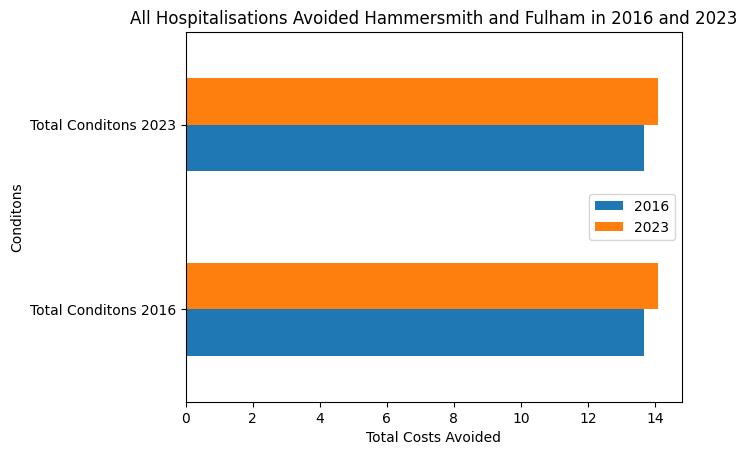

In [87]:
import matplotlib.pyplot as plt

# Total Conditions Avoided in Hammersmith and Fulham in 2016 and 2023

Total_Conditions_2016 = [13.678086]
Total_Conditions_2023 = [14.08233]
index = ['Total Conditons 2016', 'Total Conditons 2023']
df = pd.DataFrame({'2016': Total_Conditions_2016,'2023': Total_Conditions_2023}, index=index)
ax = df.plot.barh()

plt.title('All Hospitalisations Avoided Hammersmith and Fulham in 2016 and 2023')
plt.ylabel('Conditons')
plt.xlabel('Total Costs Avoided')
plt.legend()

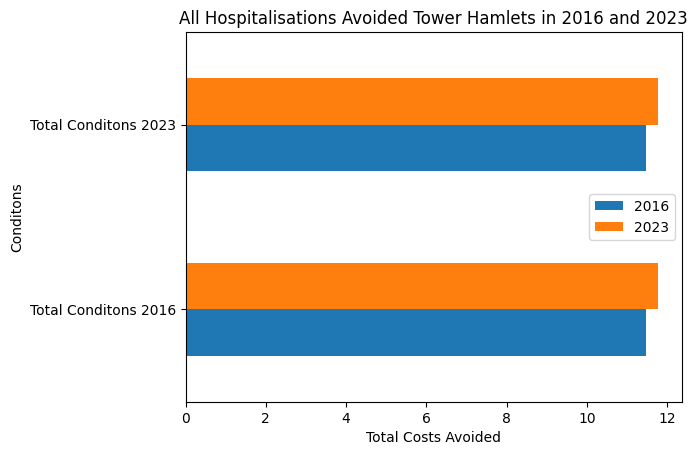

In [88]:
import matplotlib.pyplot as plt

# Total Conditions Avoided in Tower Hamlets in 2016 and 2023

Total_Conditions_2016 = [11.475763]
Total_Conditions_2023 = [11.763121]
index = ['Total Conditons 2016', 'Total Conditons 2023']
df = pd.DataFrame({'2016': Total_Conditions_2016,'2023': Total_Conditions_2023}, index=index)
ax = df.plot.barh()

plt.title('All Hospitalisations Avoided Tower Hamlets in 2016 and 2023')
plt.ylabel('Conditons')
plt.xlabel('Total Costs Avoided')
plt.legend()

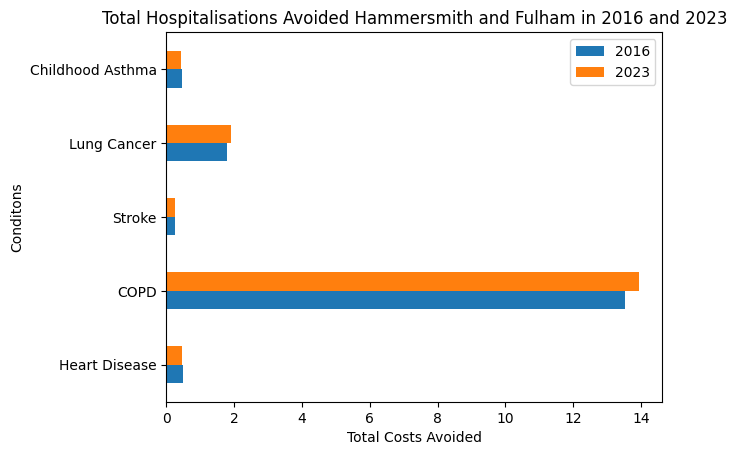

In [89]:
import matplotlib.pyplot as plt

# Total Hospitalisations Avoided in Hammersmith and Fulham in 2016 and 2023

Total_Conditions_2016 = [0.490831, 13.541428, 0.249925, 1.789825, 0.461432]
Total_Conditions_2023 = [0.474597, 13.934753, 0.243043, 1.912438, 0.439283]
index = ['Heart Disease','COPD','Stroke','Lung Cancer', 'Childhood Asthma']
df = pd.DataFrame({'2016': Total_Conditions_2016,'2023': Total_Conditions_2023}, index=index)
ax = df.plot.barh()

plt.title('Total Hospitalisations Avoided Hammersmith and Fulham in 2016 and 2023')
plt.ylabel('Conditons')
plt.xlabel('Total Costs Avoided')
plt.legend()

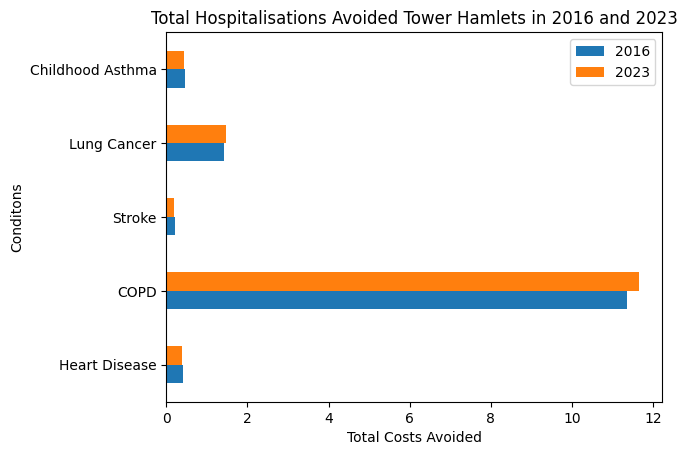

In [90]:
import matplotlib.pyplot as plt

# Total Hospitalisations Avoided in Tower Hamlets in 2016 and 2023

Total_Conditions_2016 = [0.413478, 11.366999, 0.209381, 1.432522, 0.466397]
Total_Conditions_2023 = [0.395478, 11.653012, 0.19726, 1.481082, 0.435217]
index = ['Heart Disease','COPD','Stroke','Lung Cancer', 'Childhood Asthma']
df = pd.DataFrame({'2016': Total_Conditions_2016,'2023': Total_Conditions_2023}, index=index)
ax = df.plot.barh()

plt.title('Total Hospitalisations Avoided Tower Hamlets in 2016 and 2023')
plt.ylabel('Conditons')
plt.xlabel('Total Costs Avoided')
plt.legend()

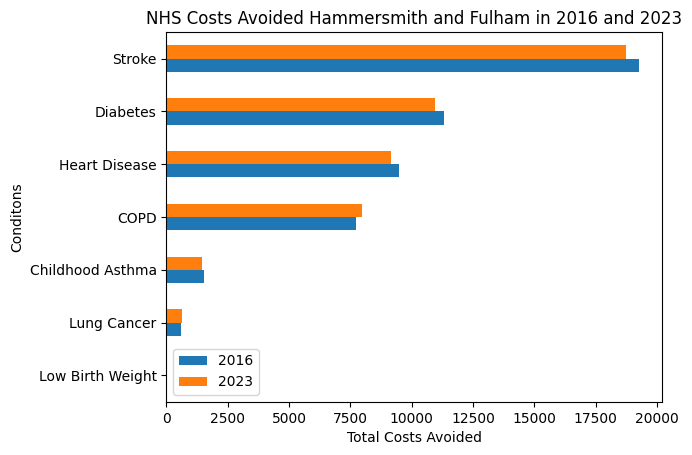

In [91]:
import matplotlib.pyplot as plt

# NHS Costs Avoided for years 2016 and 2023 against Conditions/Diseases in Hammersmith and Fulham

Costs_Avoided_2016 = [0.00, 596.63, 1512.99, 7738.74, 9475.76, 11320.98, 19258.20]
Costs_Avoided_2023 = [0.00, 637.47, 1439.58, 7962.33, 9161.32, 10938.62, 18726.02]
index = ['Low Birth Weight','Lung Cancer','Childhood Asthma','COPD','Heart Disease', 'Diabetes','Stroke']
df = pd.DataFrame({'2016': Costs_Avoided_2016,'2023': Costs_Avoided_2023}, index=index)
ax = df.plot.barh()

plt.title('NHS Costs Avoided Hammersmith and Fulham in 2016 and 2023')
plt.ylabel('Conditons')
plt.xlabel('Total Costs Avoided')
plt.legend()

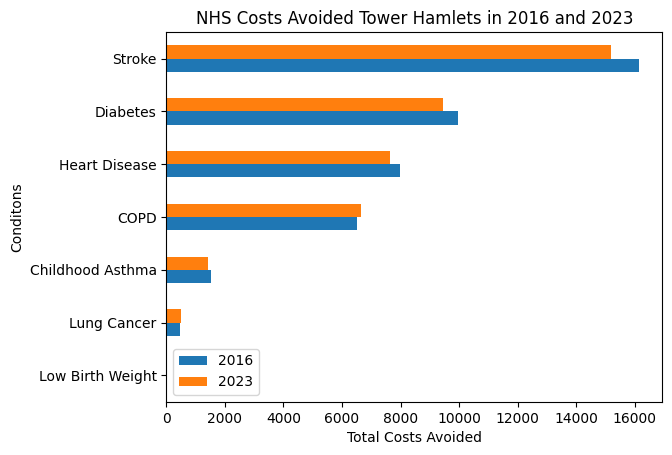

In [92]:
import matplotlib.pyplot as plt

# NHS Costs Avoided for years 2016 and 2023 against Conditions/Diseases in Tower Hamlets

Costs_Avoided_2016 = [0.00, 477.55, 1533.23, 6498.22, 7988.67, 9955.37, 16142.24]
Costs_Avoided_2023 = [0.00, 493.73, 1429.99, 6660.94, 7640.08, 9464.17, 15207.24]
index = ['Low Birth Weight','Lung Cancer','Childhood Asthma','COPD','Heart Disease', 'Diabetes','Stroke']
df = pd.DataFrame({'2016': Costs_Avoided_2016,'2023': Costs_Avoided_2023}, index=index)
ax = df.plot.barh()

plt.title('NHS Costs Avoided Tower Hamlets in 2016 and 2023')
plt.ylabel('Conditons')
plt.xlabel('Total Costs Avoided')
plt.legend()

Text(0.5, 1.0, 'Proportion of Hospitalisations Avoided by AgeGroup Hammersmith and Fulham in 2016')

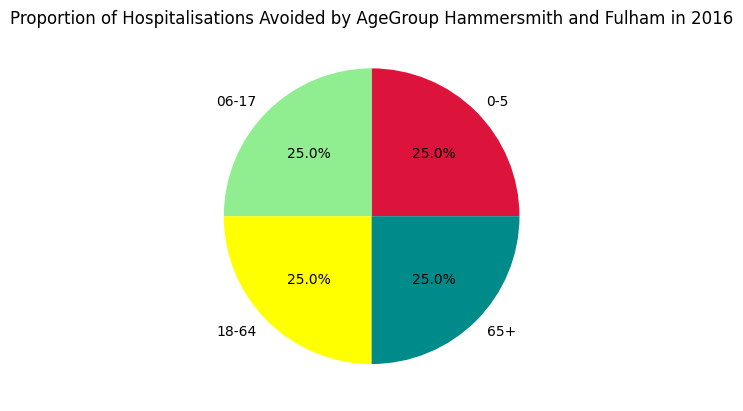

In [93]:
import matplotlib.pyplot as plt

# NHS Costs avoided against AgeGroups in Hammersmith and Fulham 2016
# figures were rounded to X2DP

labels = '0-5', '06-17', '18-64', '65+'
sizes = [25, 25, 25, 25]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=(['crimson', 'lightgreen', 'yellow', 'darkcyan']), autopct='%1.1f%%')
plt.title('Proportion of Hospitalisations Avoided by AgeGroup Hammersmith and Fulham in 2016')

Text(0.5, 1.0, 'Proportion of Hospitalisations Avoided by AgeGroup Hammersmith and Fulham in 2023')

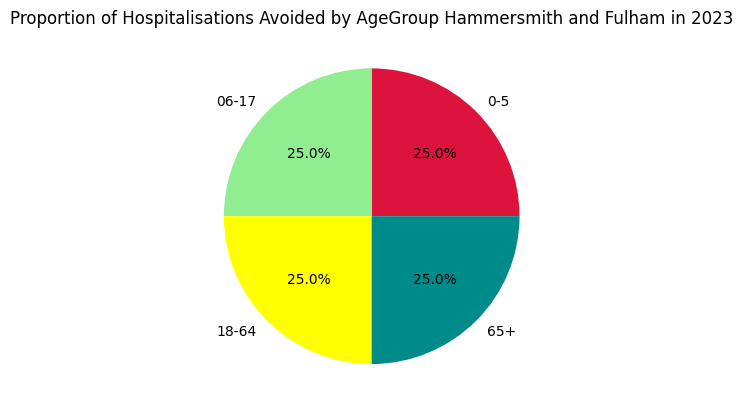

In [94]:
import matplotlib.pyplot as plt

# NHS Costs avoided against AgeGroups in Hammersmith and Fulham 2016
# figures were rounded to X2DP

labels = '0-5', '06-17', '18-64', '65+'
sizes = [25, 25, 25, 25]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=(['crimson', 'lightgreen', 'yellow', 'darkcyan']), autopct='%1.1f%%')
plt.title('Proportion of Hospitalisations Avoided by AgeGroup Hammersmith and Fulham in 2023')

Text(0.5, 1.0, 'Proportion of Hospitalisations Avoided by AgeGroup Tower Hamlets in 2016')

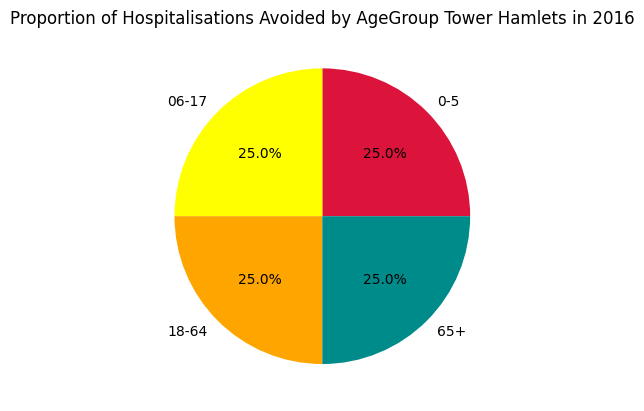

In [95]:
import matplotlib.pyplot as plt

# NHS Costs avoided against AgeGroups in Hammersmith and Fulham 2016
# figures were rounded to X2DP

labels = '0-5', '06-17', '18-64', '65+'
sizes = [25, 25, 25, 25]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=(['crimson', 'yellow', 'orange', 'darkcyan']), autopct='%1.1f%%')
plt.title('Proportion of Hospitalisations Avoided by AgeGroup Tower Hamlets in 2016')

Text(0.5, 1.0, 'Proportion of Hospitalisations Avoided by AgeGroup Tower Hamlets in 2023')

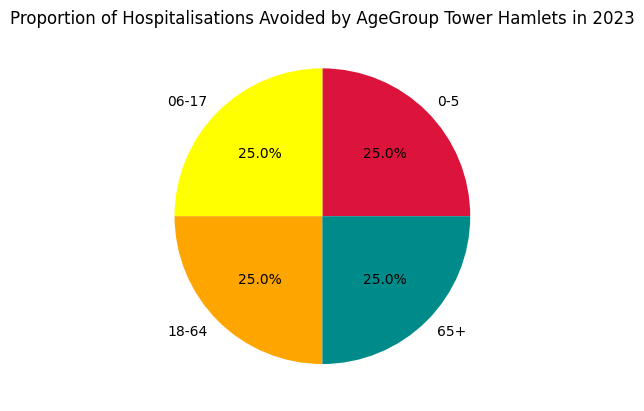

In [96]:
import matplotlib.pyplot as plt

# NHS Costs avoided against AgeGroups in Hammersmith and Fulham 2016
# figures were rounded to X2DP

labels = '0-5', '06-17', '18-64', '65+'
sizes = [25, 25,25, 25]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=(['crimson', 'yellow', 'orange', 'darkcyan']), autopct='%1.1f%%')
plt.title('Proportion of Hospitalisations Avoided by AgeGroup Tower Hamlets in 2023')

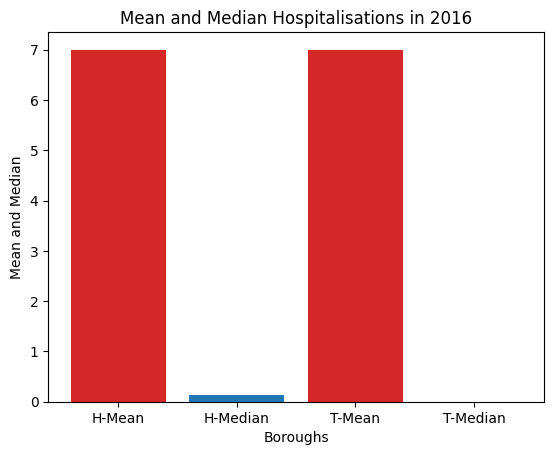

In [97]:
import matplotlib.pyplot as plt

# Taken from the filtered data Mean and Median no. Hospitalisations Avoided in 2016 for both boroughs has been rounded to X2DP

fig, ax = plt.subplots()

boroughs = ['H-Mean', 'H-Median', 'T-Mean', 'T-Median']
counts =   [7.00, 0.14, 7.00, 0.00]
bar_labels = ['Ham 16', 'Ham 16','Tow 16', 'Tow 16']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:blue']

ax.bar(boroughs, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Mean and Median')
ax.set_xlabel('Boroughs')
ax.set_title('Mean and Median Hospitalisations in 2016')

plt.show()

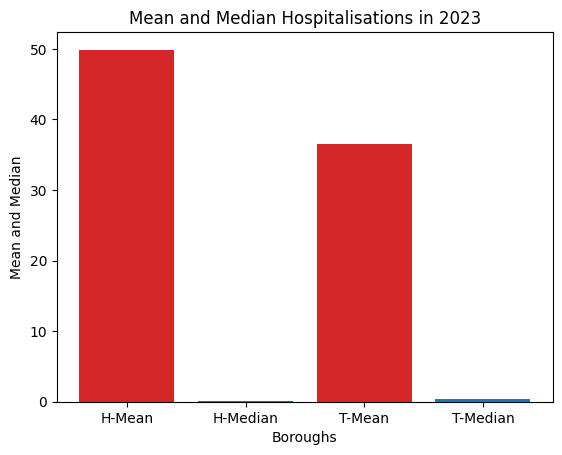

In [98]:
import matplotlib.pyplot as plt

# Taken from the filtered data Mean and Median no. Hospitalisations Avoided in 2023 has been rounded to X2DP

fig, ax = plt.subplots()

boroughs = ['H-Mean', 'H-Median', 'T-Mean', 'T-Median']
counts = [49.87, 0.14, 36.51, 0.32]
bar_labels = ['Ham 23', 'Ham 23','Tow 23', 'Tow 23']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:blue']

ax.bar(boroughs, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Mean and Median')
ax.set_xlabel('Boroughs')
ax.set_title('Mean and Median Hospitalisations in 2023')

plt.show()

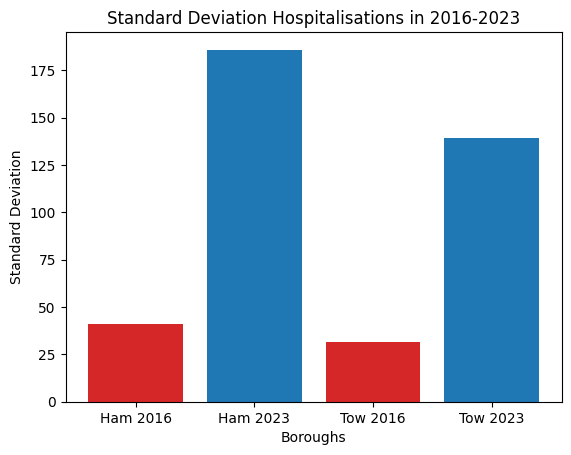

In [99]:
import matplotlib.pyplot as plt

# Taken from the filtered data Standard Deviation no. Hospitalisations Avoided in 2016 has been rounded to X2DP

fig, ax = plt.subplots()

boroughs = ['Ham 2016', 'Ham 2023', 'Tow 2016', 'Tow 2023']
counts = [40.81, 185.92, 31.60, 139.07]
bar_labels = ['Ham 16', 'Ham 23','Tow 16', 'Tow 23']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:blue']

ax.bar(boroughs, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Standard Deviation')
ax.set_xlabel('Boroughs')
ax.set_title('Standard Deviation Hospitalisations in 2016-2023')

plt.show()